In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [33]:
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [34]:
label_encoder = LabelEncoder()
df['company'] = label_encoder.fit_transform(df['company'])
df['job'] = label_encoder.fit_transform(df['job'])
df['degree'] = label_encoder.fit_transform(df['degree'])

In [35]:
X = df.drop('salary_more_then_100k', axis=1)
Y = df['salary_more_then_100k']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [38]:
dt_predictions = dt_classifier.predict(X_test)
dt_predictions

array([0, 0, 0, 1], dtype=int64)

In [39]:
dt_accuracy = accuracy_score(Y_test, dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.75


In [40]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [41]:
log_reg_predictions = log_reg.predict(X_test)
log_reg_predictions

array([1, 1, 1, 1], dtype=int64)

In [42]:
log_reg_accuracy = accuracy_score(Y_test, log_reg_predictions)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.5


In [43]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [44]:
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_predictions

array([0.60714286, 1.        , 1.10714286, 0.46428571])

In [45]:
linear_reg_mse = mean_squared_error(Y_test, linear_reg_predictions)
print("Linear Regression Accuracy:", linear_reg_mse)

Linear Regression Accuracy: 0.41677295918367346


In [46]:
import matplotlib.pyplot as plt

In [47]:
models = ['Decision Tree', 'Logistic Regression', 'Linear Regression']
accuracies = [dt_accuracy, log_reg_accuracy, 1 - linear_reg_mse]

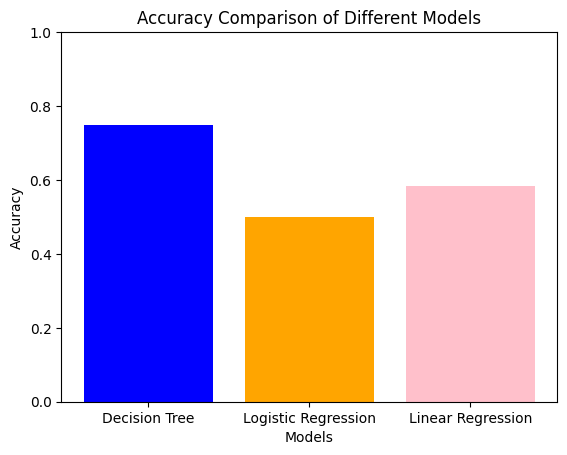

In [49]:
plt.bar(models, accuracies, color=['blue', 'orange', 'pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  
plt.show()